**Baktash Amini**

# Session 6: Regression Models and Performance Metrics
* Linear regression: model building and interpretation
* Error metrics (MSE, MAE)
* Use case: Predicting house prices or similar

# 1. Linear Regression

Linear regression is a statistical method used to model the relationship between variables. It is the simplest form of regression, where we study how one variable depends on another—denoted as:

* x: independent variable (regressor)
* y: dependent variable

**Example**: To understand how students’ exam scores depend on study hours, we can fit a regression model. This model can then predict a student’s exam score for a given number of study hours.

In [ ]:
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/zainabnazari/PWF_workshop_python_notebook/main/Day2/files/images/student_performance_plot_wo_fit.png"
display(Image(url=url, width=400, height=400))

In [3]:
url = "https://raw.githubusercontent.com/zainabnazari/PWF_workshop_python_notebook/main/Day2/files/images/student_performance_plot_w_fit.png"
display(Image(url=url, width=400, height=400))


From the plot, we can see that there is a positive correlation between study hours and exam scores. As the number of study hours increases, the exam scores tend to increase as well. The fitted line represents the regression model that best describes this relationship.

Thus, we can use a linear function to predict the values, defined as:

$\hat{y} = wx+b$

where w is the slope (weight in machine learning terminology) and b is the bias.

**Question**: What values of w and b would give a line that perfectly matches the distribution of data points?

* If the data points lie exactly on a straight line, then there exists a pair 
(𝑤,𝑏) that passes through all points perfectly.

* In most real-world cases, the data does not fall perfectly on a line. Therefore, we use performance metrics (such as Mean Squared Error) to find the values of 𝑤 and 𝑏 that give the best-fitting line.

# 2. Performance Metrics
**Definition**: Performance metrics measure how well the model’s predictions match the actual data.

**Role in training**: They provide feedback on the model’s accuracy.

**Optimization**: By computing the gradients of the performance metric (loss function), we can iteratively update the weights (𝑤,𝑏) to minimize the error.


# 2.1 Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** measures the average squared difference between the predicted values and the true values.  
It tells us, on average, how far the predictions are from the actual values, giving **more weight to larger errors** because the differences are squared.

The general formula is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

For a simple linear regression model, where the predictions are given by $\hat{y} = wx + b$, the formula becomes:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (wx_i + b) \right)^2
$$

**Key points:**
- MSE is always non-negative: smaller values indicate better model performance.
- Squaring the errors penalizes larger deviations more heavily.
- MSE is differentiable, which makes it suitable for **gradient-based optimization** to update weights \(w\) and bias \(b\).



# 2.2 Mean Absolute Error (MAE)

The **Mean Absolute Error (MAE)** measures the average magnitude of the errors in predictions, **without considering their direction**.  
It tells us, on average, how far the predictions are from the true values. Unlike MSE, it **does not square the errors**, so it is **less sensitive to outliers**.

The formula is:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

For a linear regression model $\hat{y} = wx + b$, the MAE becomes:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - (wx_i + b) \right|
$$

**Key points:**
- MAE = 0 means perfect predictions.
- Smaller MAE values indicate better model performance.
- MAE is more robust to large errors compared to MSE.


# 2.3 Gradient Descent (Updating Weights)

We start by picking some initial values for the weight \(w\) and bias \(b\).  
Then we try to improve them step by step so that our model makes better predictions.  

The idea is simple: we look at the slope of the loss function (the gradient) and **move in the opposite direction**, because that’s the direction that reduces the error the most.  

For a linear regression model with **Mean Squared Error (MSE)** as the loss:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)^2
$$

The gradients of the loss with respect to \(w\) and \(b\) are:

$$
dw = \frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \Big( y_i - (w x_i + b) \Big)
$$

$$
db = \frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \Big( y_i - (w x_i + b) \Big)
$$

Then, we update the weights using these gradients:

$$
w = w - \alpha \, dw
$$

$$
b = b - \alpha \, db
$$

Here, \(\alpha\) is the **learning rate**, which controls how big a step we take in the negative gradient direction:  
- Too small → learning is slow.  
- Too big → we might overshoot the minimum and never settle down.  

We repeat this process iteratively — compute gradients, update weights, check loss — until the model reaches the minimum error. This is how gradient descent helps our model **learn the best values for \(w\) and \(b\)**.


In [ ]:
# Loading figure to Colab
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/zainabnazari/PWF_workshop_python_notebook/main/Day2/files/images/gradient_descent.png"
display(Image(url=url, width=400, height=400))


# 3 Implementation of Linear Regression in Code

In [50]:
class LinearRegression:

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iterations
        self.w = None
        self.b = None   
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
        
            # y = wx+b
            y_pred = np.dot(X, self.w) + self.b

            # compute gradients
            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # update weights
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred


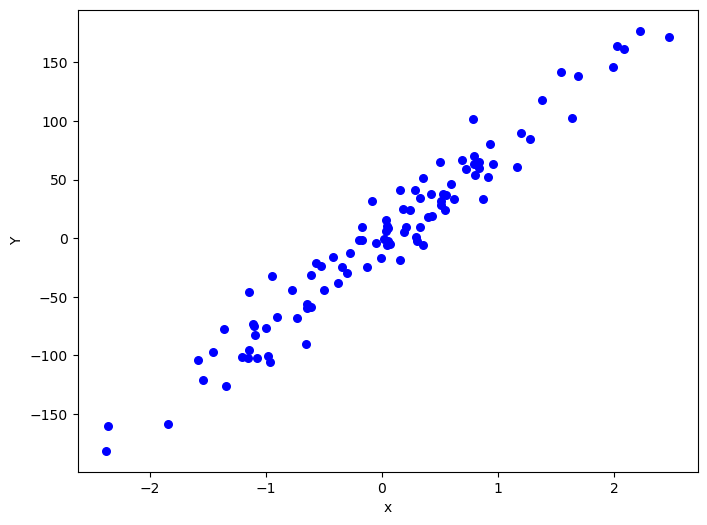

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Simulated dataset: Wedding expenses vs number of guests
np.random.seed(4)

#Dataset 
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# Plot
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="b", marker="o", s=30)
plt.xlabel("x")
plt.ylabel("Y")
plt.title("")
plt.show()


In [85]:

regressor = LinearRegression(learning_rate = 0.05)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [86]:
def mse(y_true, y_predicted):
    return np.mean((y_true-y_predicted)**2)

[-180.62675569 -176.90338917 -173.18002264 -169.45665612 -165.73328959
 -162.00992306 -158.28655654 -154.56319001 -150.83982349 -147.11645696]


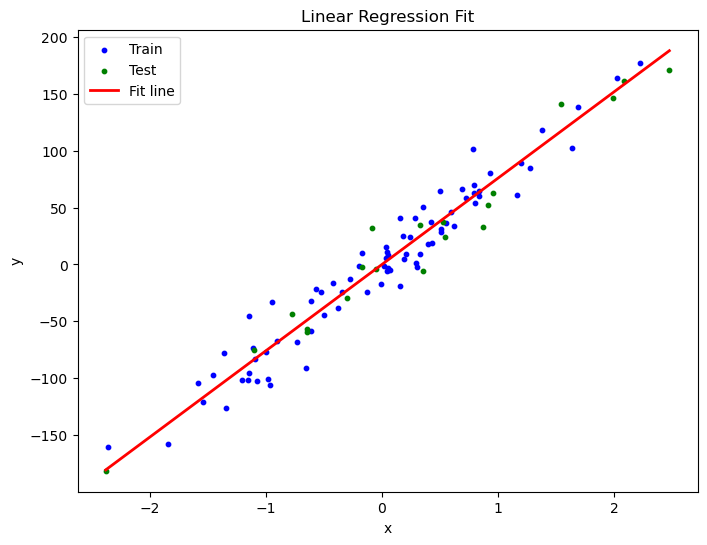

In [90]:
# Make a line over the whole X range
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = regressor.predict(X_line)

print(y_pred_line[:10])

# Plot everything
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="blue", s=10, label="Train")
plt.scatter(X_test, y_test, color="green", s=10, label="Test")
plt.plot(X_line, y_pred_line, color="red", linewidth=2, label="Fit line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [93]:
# Predict on training and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"Test MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

Training MSE: 290.253, MAE: 13.847
Test MSE: 295.353, MAE: 13.407


# Example 1: Predicting House Prices

Training MSE: 3.2311742677852644e-27
Training MAE: 5.684341886080802e-14
Training R^2: 1.0
Test MSE: 3.2311742677852644e-27
Test MAE: 5.684341886080802e-14
Test R^2: 1.0


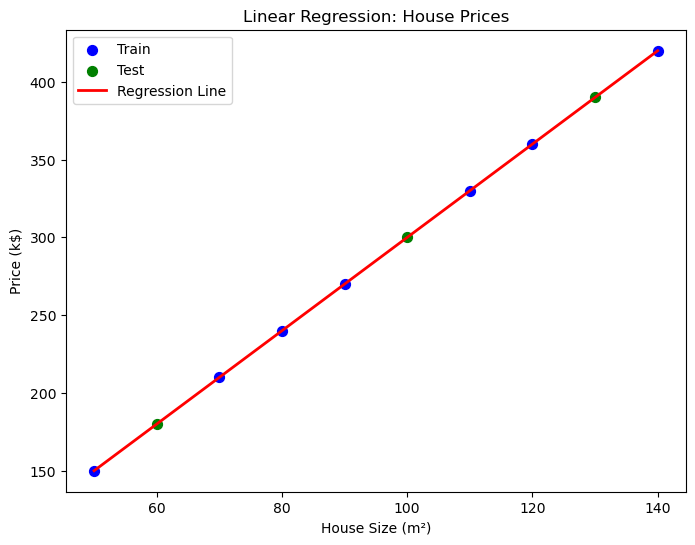

In [95]:
# Example 1: Predicting House Prices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140]).reshape(-1,1)
y = np.array([150, 180, 210, 240, 270, 300, 330, 360, 390, 420])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Performance metrics
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

# Plot
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred_line = regressor.predict(X_line)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="blue", s=50, label="Train")
plt.scatter(X_test, y_test, color="green", s=50, label="Test")
plt.plot(X_line, y_pred_line, color="red", linewidth=2, label="Regression Line")
plt.xlabel("House Size (m²)")
plt.ylabel("Price (k$)")
plt.title("Linear Regression: House Prices")
plt.legend()
plt.show()


## TODOs for Example 1:
1. **Interpret the metrics:**  
   - Compare MSE and MAE on training and test sets. Which metric is easier to interpret? Why?

2. **Experiment with new data:**  
   - Add a few new house sizes (e.g., 145, 160) and predict their prices. How does the line fit these points?

3. **Effect of outliers:**  
   - Add extreme house prices (very cheap or expensive) to the dataset.  
   - Recompute MSE and MAE. Which metric changes more and why?

4. **Visual exploration:**  
   - Change the marker size or color for training/test points.  
   - Observe how clearly the line separates training and test data.
